In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams["axes.unicode_minus"]=False

from sklearn.model_selection import train_test_split
import mglearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import warnings 
from sklearn.tree import export_graphviz
warnings.filterwarnings('ignore')
import graphviz

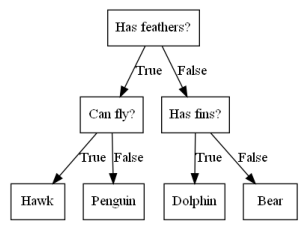

In [2]:
import os

os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"
mglearn.plots.plot_animal_tree()

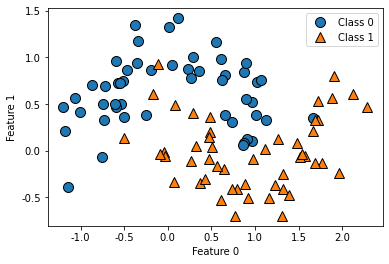

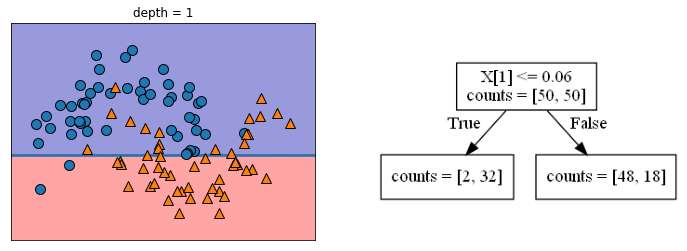

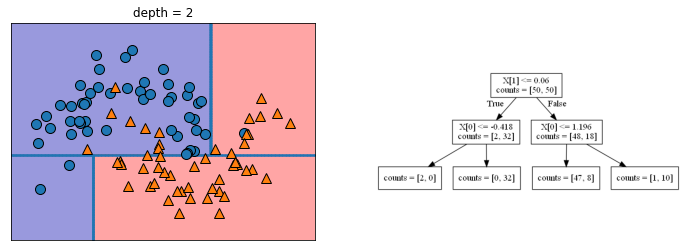

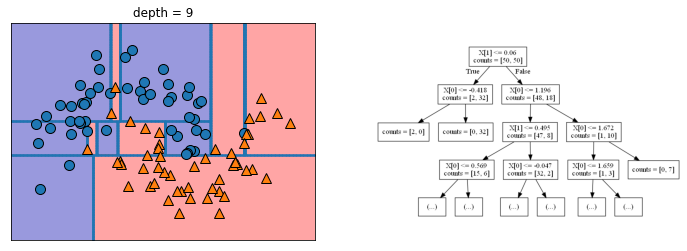

In [3]:
mglearn.plots.plot_tree_progressive()

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
# stratify->데이터를 여러개의 계층으로 나누어서 골고루 뽑음

In [5]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)

In [6]:
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9882629107981221
테스트 정확도 :  0.951048951048951


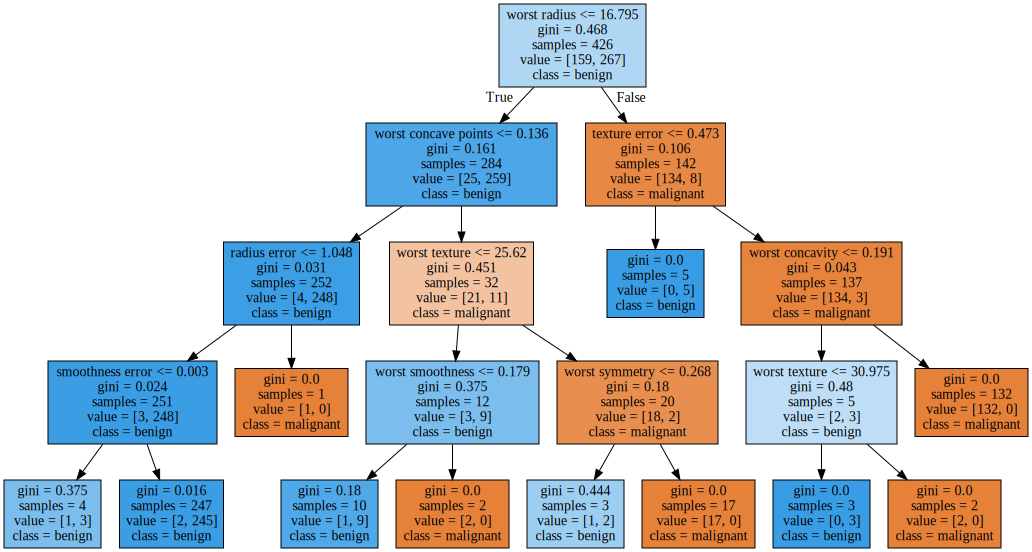

In [7]:
export_graphviz(tree, out_file="C:/Users/X-Note/study/tree.dot", class_names=["malignant","benign"], 
                feature_names=cancer.feature_names,impurity=True, filled=True)

with open("C:/Users/X-Note/study/tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [8]:
tree= DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train,y_train)
print("훈련 정확도",tree.score(X_train,y_train))
print("테스트 정확도",tree.score(X_test,y_test))

훈련 정확도 0.9882629107981221
테스트 정확도 0.951048951048951


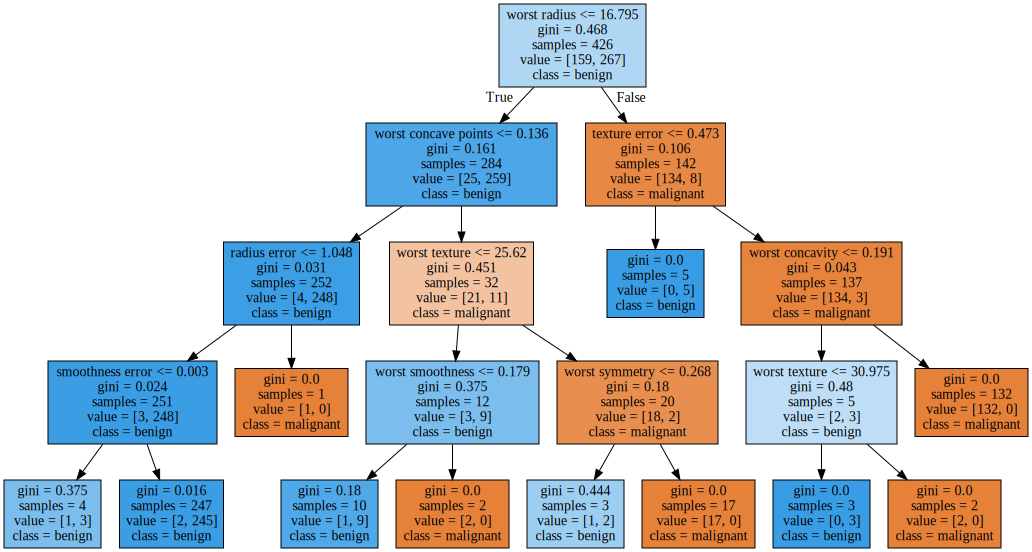

In [9]:
export_graphviz(tree,out_file="C:/Users/X-Note/study/tree.dot", class_names=["malignant","benign"], feature_names=cancer.feature_names,
                impurity=True, filled=True)

with open("C:/Users/X-Note/study/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


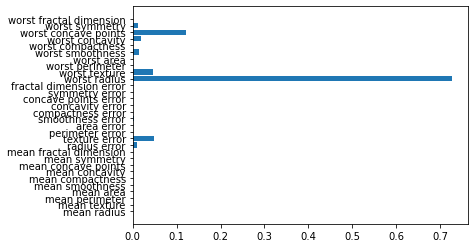

In [12]:
def plot_feature_importance_cancer():
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), tree.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
plot_feature_importance_cancer()